Link to tutorial: [https://docs.descarteslabs.com/docs/tutorials/land_cover_demo.html](https://docs.descarteslabs.com/docs/tutorials/land_cover_demo.html)

# Intro to Land Cover with the Descartes Labs Platform



In [1]:
import os
import warnings
from pprint import pprint
#alage: import pprint
# Instead of using the `descarteslabs login` command, you can manually set the token information.
# Probably not wise to then share this notebooks with others.
os.environ['CLIENT_ID'] = 'TODO'
os.environ['CLIENT_SECRET'] = 'TODO'

from __future__ import print_function

import descarteslabs as dl

%matplotlib inline
import matplotlib.pyplot as plt
import shapely.geometry
import cartopy
import numpy as np
import pyproj


reference_points = { "type": "FeatureCollection",

                     "crs": { "type": "name",
                              "properties": { "name": "urn:ogc:def:crs:OGC:1.3:CRS84"} },

                     "features": [

                        { "type": "Feature",
                           "id": 14348,
                           "properties": {
                                "descript": "Cultivated Crops",
                                "created": "2016-3",
                                "lc_code": 1,
                                "dataset": "GFSAD30" },
                          "geometry": { "type": "Point",
                                       "coordinates": [ -57.864114, -13.458213 ] }},

                    { "type": "Feature",
                           "id": 30895,
                           "properties": {
                                "descript": "Forest",
                                "created": "2016-0",
                                "lc_code": 2,
                                "dataset": "GFSAD30" },
                          "geometry": { "type": "Point",
                                       "coordinates": [ -57.345734, -12.748814 ] }}

                                ]
                   }



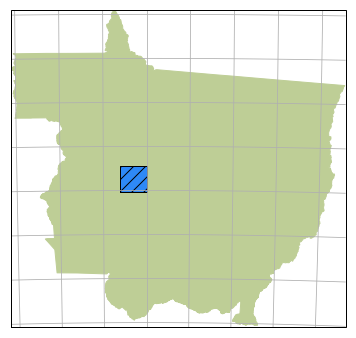

In [2]:
# Get attribute data for the point
point = reference_points['features'][0]
lon = point['geometry']['coordinates'][0]
lat = point['geometry']['coordinates'][1]
year = point['properties']['created'][:4]

# calculate the UTM zone using longitude
zone = int((lon + 180) / 6.0) + 1

# construct a tile around the centroid
# with 833x833 valid image pixels
# with 16 pixels of padding around each grid cell
# and grid spatial resolution of 120m
valid_pix = 833
padding = 0
grid_size = valid_pix + padding
res = 120.0
dltile = dl.raster.dltile_from_latlon(lat, lon, res, valid_pix, padding)


# Let's visualize the state and the dltile.

# load the lat/lon and utm projections
lonlat_crs = cartopy.crs.PlateCarree()
utm = cartopy.crs.UTM(zone, southern_hemisphere=True)

# Let's get the geometry for Mato Grosso for visualization
mato_grosso = dl.places.shape('south-america_brazil_mato-grosso')

# Plot Mato Grosso and the image tile containing the reference point
fig = plt.figure(figsize=(6, 6))
ax = plt.subplot(projection=utm) # Specify projection of the map here
shp = shapely.geometry.shape(mato_grosso['geometry'])
shp2 = shapely.geometry.shape(dltile['geometry'])

# Add geometry with lat/long, specifying the latlon projection
ax.add_geometries([shp], lonlat_crs, color='#bece96')
ax.add_geometries([shp2], lonlat_crs, color='#2e89f7', edgecolor='k', hatch='//')

# Set extents in latlon, specifying the latlon projection
bbox = mato_grosso['bbox']
ax.set_extent((bbox[0], bbox[2], bbox[1], bbox[3]), crs=lonlat_crs)
ax.gridlines(crs=lonlat_crs)
plt.show()



In [3]:
# use products, start_time, end_time, geom, and cloud_fraction
# parameters to limit our imagery search to

images = dl.metadata.search(
                                products=["modis:09:CREFL"],
                                start_time='2016-01-01',
                                end_time='2016-12-31',
                                geom=dltile['geometry'],
                                cloud_fraction=0.9,
                                limit = 1000
                                )


n_images = len(images['features'])
print('Number of image matches: %d' % n_images)


Number of image matches: 468


In [4]:
# let's see which bands are available from both sensors

mo = dl.raster.get_bands_by_constellation("MO").keys()
my = dl.raster.get_bands_by_constellation("MY").keys()
avail_bands = set(mo).intersection(my)
print('Available bands: %s' % ', '.join([a for a in avail_bands]))


AttributeError: 'Raster' object has no attribute 'get_bands_by_constellation'